In [1]:
import os
import numpy as np
from dataset import get_data,get_HOG, standardize
from matplotlib import pyplot as plt

######################## Get train/test dataset ########################
X_train,X_test,Y_train,Y_test = get_data('dataset')
########################## Get HoG featues #############################
H_train,H_test = get_HOG(X_train), get_HOG(X_test)
######################## standardize the HoG features ####################
H_train,H_test = standardize(H_train), standardize(H_test)
########################################################################
######################## Implement you code here #######################
########################################################################

*********** extract HoG features ***********


100%|██████████| 10000/10000 [00:02<00:00, 4046.99it/s]


*********** extract HoG features ***********


100%|██████████| 2000/2000 [00:00<00:00, 3935.78it/s]


https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC  
https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC  
https://www.cnblogs.com/komean/p/11008586.html

## Linear SVM

### Training

In [2]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
clf.fit(H_train, Y_train)

SVC(kernel='linear')

### Accuracy

In [3]:
np.sum(clf.predict(H_test) == Y_test) / Y_test.shape[0]

0.846

### Count support vectors

In [4]:
np.sum(clf.n_support_)

3714

### Count positive and negative support vectors

In [5]:
clf.n_support_

array([1845, 1869])

### Visualize the top 20 images

In [6]:
idx = np.argsort(clf.dual_coef_[0])
def find_original_idx(idx_in_support_vector: int) -> int:
    return np.where(np.equal(H_train, clf.support_vectors_[idx_in_support_vector]).all(axis=1))[0][0]

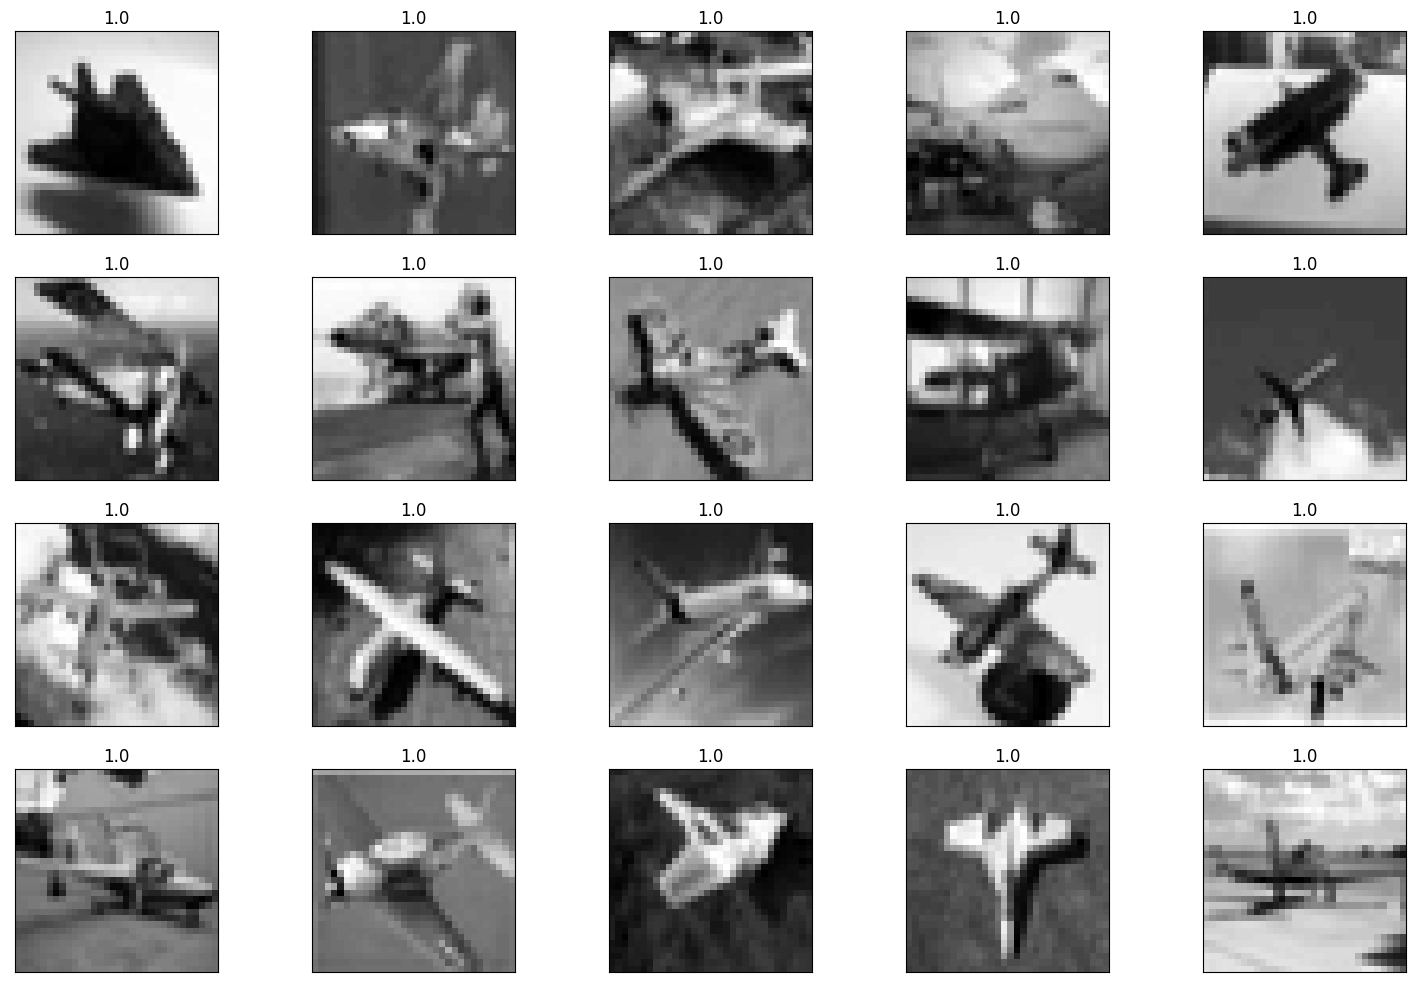

In [7]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
fig.tight_layout(h_pad=1)
for i, elem in enumerate(idx[:20]):
    plt.subplot(4, 5, i + 1)
    ori_idx = find_original_idx(elem)
    plt.imshow(X_train[ori_idx], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(str(clf.dual_coef_[0][elem] / np.sign(Y_train[ori_idx] - 0.5)))
plt.show()

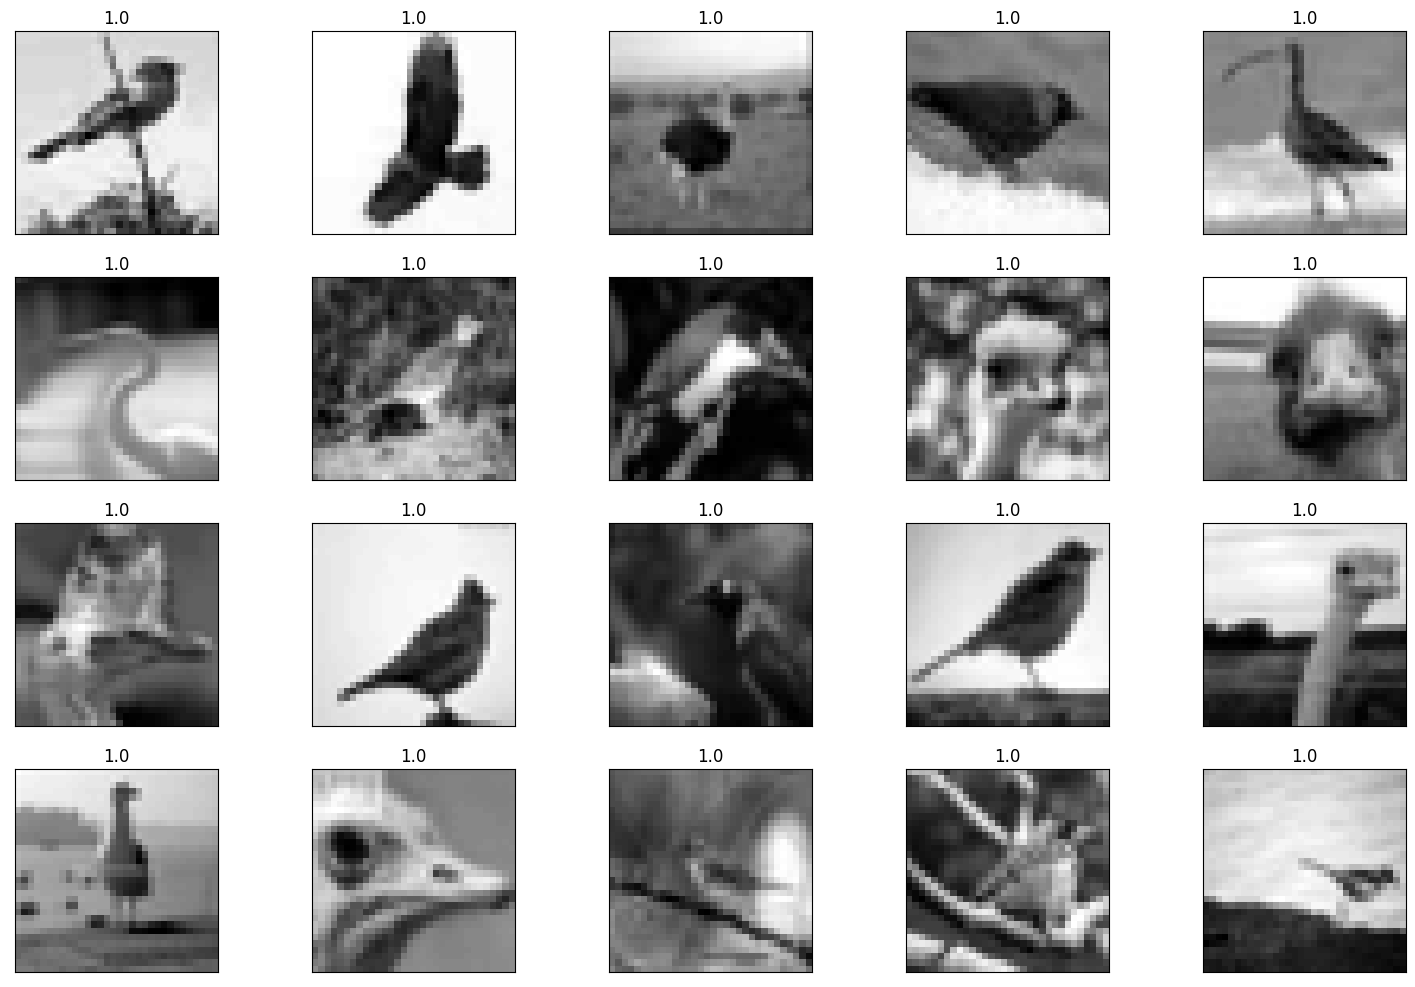

In [8]:
fig, ax = plt.subplots(4, 5, figsize=(15, 10))
fig.tight_layout(h_pad=1)
for i, elem in enumerate(idx[-20:]):
    plt.subplot(4, 5, i + 1)
    ori_idx = find_original_idx(elem)
    plt.imshow(X_train[ori_idx], cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(str(clf.dual_coef_[0][elem] / np.sign(Y_train[ori_idx] - 0.5)))
plt.show()

## RBF kernel SVM

In [9]:
clf_rbf = SVC(gamma='scale')
clf_rbf.fit(H_train, Y_train)
np.sum(clf_rbf.predict(H_test) == Y_test) / Y_test.shape[0]

0.8795

## Polynomial kernel SVM